Name: Yitong Ouyang
<br>
Github Username: Yvette0512

<center><h1>Time Series Classification on Human Activities</h1></center>
<br>
<br>

## 1. Time Series Classification Part 1: Feature Creation/Extraction

### (a) Obtain Data

Import packages

In [105]:
import csv
import pandas as pd
import glob
import os
from pathlib import Path
import numpy as np

Get the AReM Data Set

In [115]:
#create a whole data
directory = "Datasets/"


dfs = []
for file in Path(directory).glob("**/*.csv"):
    df = pd.read_csv(file, skiprows = 4)
df

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,0,41.67,0.47,17.67,2.87,14.50,2.06
1,250,42.00,2.12,9.67,6.34,14.75,2.49
2,500,35.75,1.79,13.75,3.03,18.50,4.09
3,750,34.25,4.02,17.75,1.09,16.25,3.70
4,1000,36.50,4.33,14.75,1.09,12.67,4.92
...,...,...,...,...,...,...,...
475,118750,41.75,1.79,11.00,6.00,16.67,2.49
476,119000,36.33,0.47,16.00,3.16,20.33,1.70
477,119250,31.50,1.50,21.00,0.00,12.25,7.12
478,119500,34.25,6.38,12.67,2.49,15.25,4.21


In [169]:
#create a path:
my_path = os.getcwd()
my_path = os.path.join(my_path, 'Datasets')

data_dirs = []
for f in os.listdir(my_path):
    fullpath = os.path.join(my_path, f)
    data_dirs.append(fullpath)
        
print(data_dirs)

['/Users/oyyt/04_DSCI552/Homework/homework_3/Datasets/bending1', '/Users/oyyt/04_DSCI552/Homework/homework_3/Datasets/walking', '/Users/oyyt/04_DSCI552/Homework/homework_3/Datasets/bending2', '/Users/oyyt/04_DSCI552/Homework/homework_3/Datasets/.ipynb_checkpoints', '/Users/oyyt/04_DSCI552/Homework/homework_3/Datasets/standing', '/Users/oyyt/04_DSCI552/Homework/homework_3/Datasets/sitting', '/Users/oyyt/04_DSCI552/Homework/homework_3/Datasets/lying', '/Users/oyyt/04_DSCI552/Homework/homework_3/Datasets/cycling']


### (b) Splitting Data

In [138]:
import os
import pandas as pd

# List all directories containing the datasets
dirs = ['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing', 'walking']

# Create an empty DataFrame to hold the combined dataset
df_train = pd.DataFrame()
df_test = pd.DataFrame()

# Loop through each directory and combine specific datasets into one DataFrame
for directory in dirs:
    if directory == 'bending1' or directory == 'bending2':
        class_label = 1
    else:
        class_label = 0
    for file in os.listdir(f'datasets/{directory}'):
        if file.endswith('.csv'):
            if (directory == 'bending1' and file in ['dataset1.csv', 'dataset2.csv']) or \
                (directory == 'bending2' and file in ['dataset1.csv', 'dataset2.csv']) or \
                (directory in ['cycling', 'lying', 'sitting'] and file in ['dataset1.csv', 'dataset2.csv', 'dataset3.csv']) or \
                (directory == 'standing' and file in ['dataset1.csv', 'dataset2.csv', 'dataset3.csv']) or \
                (directory == 'walking' and file in ['dataset1.csv', 'dataset2.csv', 'dataset3.csv']):
                    df = pd.read_csv(f'datasets/{directory}/{file}', skiprows=4)
                    df['class'] = class_label
                    df_train = pd.concat([df_train, df], axis=0)
            else:
                df1 = pd.read_csv(f'datasets/{directory}/{file}', skiprows=4)
                df1['class'] = class_label
                df_test = pd.concat([df_test, df1], axis=0)
                    
# df_train['class'] = class_label
# df_test['class'] = class_label
                

# Print the shape of the combined dataset and the first few rows
print(df_train.shape)
print(f"Directory: {directory}, class=1: {sum(df_train['class']==1)}, class=0: {sum(df_train['class']==0)}")
df_train.head()

(9120, 8)
Directory: walking, class=1: 1920, class=0: 7200


,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,class
0,0,39.25,0.43,22.75,0.43,33.75,1.3,1
1,250,39.25,0.43,23.00,0.00,33.00,0.0,1
2,500,39.25,0.43,23.25,0.43,33.00,0.0,1
3,750,39.50,0.50,23.00,0.71,33.00,0.0,1
4,1000,39.50,0.50,24.00,0.00,33.00,0.0,1


In [217]:
#create a path for train and test data:
import os
import re

train_path = []
test_path = []

for folder in data_dirs:
    if len(os.listdir(folder)) < 10:
        for count, data in enumerate(os.listdir(folder)):
            if 'dataset1' in data or 'dataset2' in data:
                test_path.append(os.path.join(folder, data))
            else:
                train_path.append(os.path.join(folder, data))
    else:
        for count, data in enumerate(os.listdir(folder)):
            if data == 'dataset1.csv' or data == 'dataset2.csv' or data == 'dataset3.csv':
                test_path.append(os.path.join(folder, data))
            else:
                #create a path for train and test data:
                train_path.append(os.path.join(folder, data))

# print(test_path)
# print(train_path)

In [108]:
# Print the shape of the combined test dataset and the first few rows
print(df_test.shape)
print(f"Directory: {directory}, class=1: {sum(df_test['class']==1)}, class=0: {sum(df_test['class']==0)}")
df_test.head()

(33119, 8)
Directory: walking, class=1: 4320, class=0: 28799


,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,class
0,0,42.00,0.00,18.50,0.50,12.00,0.00,1
1,250,42.00,0.00,18.00,0.00,11.33,0.94,1
2,500,42.75,0.43,16.75,1.79,18.25,0.43,1
3,750,42.50,0.50,16.75,0.83,19.00,1.22,1
4,1000,43.00,0.82,16.25,0.83,18.00,0.00,1


### (c) Feature Extraction

In [129]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import defaultdict

directory = "Datasets/"
data = defaultdict(list)

#create a template for dict
columns = ["avg_rss12","var_rss12","avg_rss13", "var_rss13","avg_rss23", "var_rss23"]
parameters = ["mean","min","max","median","qua1","qua3","std"] 

col_num_dict = {col: i+1 for i, col in enumerate(columns)}

for p in parameters:
    for i in range(1, len(columns)+1):
        data[p+'_'+str(i)] = []

#iterate over files
for file in Path(directory).glob("**/*.csv"):
    try:
        df = pd.read_csv(file, skiprows=4)
        df = df.drop('# Columns: time', axis=1)
        parent_folder = file.parent.name
        if parent_folder == "bending1" or parent_folder == "bending2":
            classification = 1
        else:
            classification = 0
        for col in df.columns[0:]:
            a = pd.DataFrame(df[col])
            col_num = col_num_dict[col]
            data["mean" + '_' + str(col_num)].append(np.mean(a, axis = 0)[col])
            data["min" + '_' + str(col_num)].append(np.min(a, axis = 0)[col])
            data["max" + '_' + str(col_num)].append(np.max(a, axis = 0)[col])
            data["median" + '_' + str(col_num)].append(np.median(a))
            data["qua1" + '_' + str(col_num)].append(np.quantile(a, 0.25))
            data["qua3" + '_' + str(col_num)].append(np.quantile(a, 0.75))
            data["std" + '_' + str(col_num)].append(np.std(a)[col])
        data["class"].append(classification)
    except (pd.errors.EmptyDataError, pd.errors.ParserError, KeyError):
        #skip files that cannot be read or do not contain the expected columns
        continue

# print(df)
df1 = pd.DataFrame.from_dict(data)
df1

,mean_1,mean_2,mean_3,mean_4,mean_5,mean_6,min_1,min_2,min_3,min_4,...,qua3_4,qua3_5,qua3_6,std_1,std_2,std_3,std_4,std_5,std_6,class
0,43.969125,0.413125,15.868021,0.666354,22.103750,0.555313,36.25,0.0,1.50,0.0,...,0.9400,23.7500,0.8300,1.616677,0.262837,3.738520,0.788162,3.314843,0.487318,1
1,43.454958,0.378083,15.793333,0.849354,23.034792,0.679646,37.00,0.0,5.75,0.0,...,1.1200,24.0000,0.8700,1.384653,0.315237,3.843628,0.994724,2.486268,0.621885,1
2,42.179813,0.696042,22.183625,0.989917,33.493917,0.613521,33.00,0.0,8.50,0.0,...,1.3000,36.3300,1.0000,3.666840,0.630203,3.806498,0.952736,3.845436,0.523771,1
3,41.678063,0.535979,19.006562,0.841875,29.857083,0.383292,33.00,0.0,3.00,0.0,...,1.1200,31.2500,0.5000,2.241152,0.405046,4.082847,0.927833,2.408514,0.388759,1
4,40.624792,0.358604,19.040937,0.832542,34.311292,0.570583,37.25,0.0,4.00,0.0,...,1.1200,36.0000,1.3000,1.475428,0.322269,4.458301,0.964652,2.186168,0.582308,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,35.752354,3.328104,16.055021,2.871125,16.001271,3.069667,18.50,0.0,5.00,0.0,...,3.7800,18.0625,4.0600,4.609992,2.138345,3.442554,1.703043,3.116805,1.746503,0
84,37.177042,2.374208,16.531083,2.910604,19.607250,2.921729,24.25,0.0,5.50,0.0,...,3.9175,21.7500,3.9000,3.577569,1.600130,3.427331,1.598469,2.887335,1.850669,0
85,36.244083,2.736021,18.435708,3.129792,18.497146,3.530500,23.33,0.0,7.00,0.0,...,4.2400,21.0000,4.6175,3.818032,2.089821,4.017438,1.808612,3.613931,1.961639,0
86,36.957458,2.420083,15.313417,2.784146,15.989167,2.934625,26.25,0.0,7.00,0.0,...,3.7700,18.2500,4.0300,3.431283,1.723104,3.030868,1.541363,2.848701,1.629680,0


In [110]:
df

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,41.67,0.47,17.67,2.87,14.50,2.06
1,42.00,2.12,9.67,6.34,14.75,2.49
2,35.75,1.79,13.75,3.03,18.50,4.09
3,34.25,4.02,17.75,1.09,16.25,3.70
4,36.50,4.33,14.75,1.09,12.67,4.92
...,...,...,...,...,...,...
475,41.75,1.79,11.00,6.00,16.67,2.49
476,36.33,0.47,16.00,3.16,20.33,1.70
477,31.50,1.50,21.00,0.00,12.25,7.12
478,34.25,6.38,12.67,2.49,15.25,4.21


## Time Series Classification Part 2: Binary and Multiclass Classification

### (a) Binary Classification Using Logistic Regression

#### i. Plots

In [111]:
df_train

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,class
0,0,39.25,0.43,22.75,0.43,33.75,1.30,1
1,250,39.25,0.43,23.00,0.00,33.00,0.00,1
2,500,39.25,0.43,23.25,0.43,33.00,0.00,1
3,750,39.50,0.50,23.00,0.71,33.00,0.00,1
4,1000,39.50,0.50,24.00,0.00,33.00,0.00,1
...,...,...,...,...,...,...,...,...
475,118750,36.00,2.45,17.00,5.10,20.50,0.87,0
476,119000,34.33,1.89,15.00,2.45,17.00,2.12,0
477,119250,33.00,7.35,14.60,3.14,13.00,5.70,0
478,119500,31.67,1.25,11.00,6.16,19.25,2.17,0


In [127]:
#create training set with 69 instances:
col_num_dict = {col: i+1 for i, col in enumerate(columns)}

for file in Path(directory).glob("**/*.csv"):
    try:
        parent_folder = file.parent.name
        if parent_folder == "bending1" or parent_folder == "bending2":
            classification = 1
        else:
            classification = 0
        for col in file.columns[1:-1]:
            a = pd.DataFrame(df_train[col])
            col_num = col_num_dict[col]
            data["mean" + '_' + str(col_num)].append(np.mean(a, axis = 0)[col])
            data["min" + '_' + str(col_num)].append(np.min(a, axis = 0)[col])
            data["max" + '_' + str(col_num)].append(np.max(a, axis = 0)[col])
            data["median" + '_' + str(col_num)].append(np.median(a))
            data["qua1" + '_' + str(col_num)].append(np.quantile(a, 0.25))
            data["qua3" + '_' + str(col_num)].append(np.quantile(a, 0.75))
            data["std" + '_' + str(col_num)].append(np.std(a)[col])
        data["class"].append(classification)
    except (pd.errors.EmptyDataError, pd.errors.ParserError, KeyError):
        #skip files that cannot be read or do not contain the expected columns
        continue

df_train_stat = pd.DataFrame.from_dict(data)
df_train_stat

,mean_1,mean_2,mean_3,mean_4,mean_5,mean_6,min_1,min_2,min_3,min_4,...,qua3_4,qua3_5,qua3_6,std_1,std_2,std_3,std_4,std_5,std_6,class
0,43.969125,0.413125,15.868021,0.666354,22.103750,0.555313,36.25,0.0,1.50,0.0,...,0.94,23.75,0.83,1.616677,0.262837,3.738520,0.788162,3.314843,0.487318,1
1,43.454958,0.378083,15.793333,0.849354,23.034792,0.679646,37.00,0.0,5.75,0.0,...,1.12,24.00,0.87,1.384653,0.315237,3.843628,0.994724,2.486268,0.621885,1
2,42.179813,0.696042,22.183625,0.989917,33.493917,0.613521,33.00,0.0,8.50,0.0,...,1.30,36.33,1.00,3.666840,0.630203,3.806498,0.952736,3.845436,0.523771,1
3,41.678063,0.535979,19.006562,0.841875,29.857083,0.383292,33.00,0.0,3.00,0.0,...,1.12,31.25,0.50,2.241152,0.405046,4.082847,0.927833,2.408514,0.388759,1
4,40.624792,0.358604,19.040937,0.832542,34.311292,0.570583,37.25,0.0,4.00,0.0,...,1.12,36.00,1.30,1.475428,0.322269,4.458301,0.964652,2.186168,0.582308,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,38.597621,1.273712,14.684201,1.491305,17.362443,1.535987,0.00,0.0,0.00,0.0,...,2.28,21.00,2.12,7.464724,1.906167,5.728468,1.607362,8.021632,1.597849,0
172,38.597621,1.273712,14.684201,1.491305,17.362443,1.535987,0.00,0.0,0.00,0.0,...,2.28,21.00,2.12,7.464724,1.906167,5.728468,1.607362,8.021632,1.597849,0
173,38.597621,1.273712,14.684201,1.491305,17.362443,1.535987,0.00,0.0,0.00,0.0,...,2.28,21.00,2.12,7.464724,1.906167,5.728468,1.607362,8.021632,1.597849,0
174,38.597621,1.273712,14.684201,1.491305,17.362443,1.535987,0.00,0.0,0.00,0.0,...,2.28,21.00,2.12,7.464724,1.906167,5.728468,1.607362,8.021632,1.597849,0


In [112]:
#create training set with 69 instances:
col_num_dict = {col: i+1 for i, col in enumerate(columns)}

for file in Path(directory).glob("**/*.csv"):
    try:
        parent_folder = file.parent.name
        if parent_folder == "bending1" or parent_folder == "bending2":
            classification = 1
        else:
            classification = 0
        for col in df_train.columns[1:-1]:
            a = pd.DataFrame(df_train[col])
            col_num = col_num_dict[col]
            data["mean" + '_' + str(col_num)].append(np.mean(a, axis = 0)[col])
            data["min" + '_' + str(col_num)].append(np.min(a, axis = 0)[col])
            data["max" + '_' + str(col_num)].append(np.max(a, axis = 0)[col])
            data["median" + '_' + str(col_num)].append(np.median(a))
            data["qua1" + '_' + str(col_num)].append(np.quantile(a, 0.25))
            data["qua3" + '_' + str(col_num)].append(np.quantile(a, 0.75))
            data["std" + '_' + str(col_num)].append(np.std(a)[col])
        data["class"].append(classification)
    except (pd.errors.EmptyDataError, pd.errors.ParserError, KeyError):
        #skip files that cannot be read or do not contain the expected columns
        continue

df_train_stat = pd.DataFrame.from_dict(data)
df_train_stat

,mean_1,mean_2,mean_3,mean_4,mean_5,mean_6,min_1,min_2,min_3,min_4,...,qua3_4,qua3_5,qua3_6,std_1,std_2,std_3,std_4,std_5,std_6,class
0,43.969125,0.413125,15.868021,0.666354,22.103750,0.555313,36.25,0.0,1.50,0.0,...,0.94,23.75,0.83,1.616677,0.262837,3.738520,0.788162,3.314843,0.487318,1
1,43.454958,0.378083,15.793333,0.849354,23.034792,0.679646,37.00,0.0,5.75,0.0,...,1.12,24.00,0.87,1.384653,0.315237,3.843628,0.994724,2.486268,0.621885,1
2,42.179813,0.696042,22.183625,0.989917,33.493917,0.613521,33.00,0.0,8.50,0.0,...,1.30,36.33,1.00,3.666840,0.630203,3.806498,0.952736,3.845436,0.523771,1
3,41.678063,0.535979,19.006562,0.841875,29.857083,0.383292,33.00,0.0,3.00,0.0,...,1.12,31.25,0.50,2.241152,0.405046,4.082847,0.927833,2.408514,0.388759,1
4,40.624792,0.358604,19.040937,0.832542,34.311292,0.570583,37.25,0.0,4.00,0.0,...,1.12,36.00,1.30,1.475428,0.322269,4.458301,0.964652,2.186168,0.582308,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,38.597621,1.273712,14.684201,1.491305,17.362443,1.535987,0.00,0.0,0.00,0.0,...,2.28,21.00,2.12,7.464724,1.906167,5.728468,1.607362,8.021632,1.597849,0
172,38.597621,1.273712,14.684201,1.491305,17.362443,1.535987,0.00,0.0,0.00,0.0,...,2.28,21.00,2.12,7.464724,1.906167,5.728468,1.607362,8.021632,1.597849,0
173,38.597621,1.273712,14.684201,1.491305,17.362443,1.535987,0.00,0.0,0.00,0.0,...,2.28,21.00,2.12,7.464724,1.906167,5.728468,1.607362,8.021632,1.597849,0
174,38.597621,1.273712,14.684201,1.491305,17.362443,1.535987,0.00,0.0,0.00,0.0,...,2.28,21.00,2.12,7.464724,1.906167,5.728468,1.607362,8.021632,1.597849,0


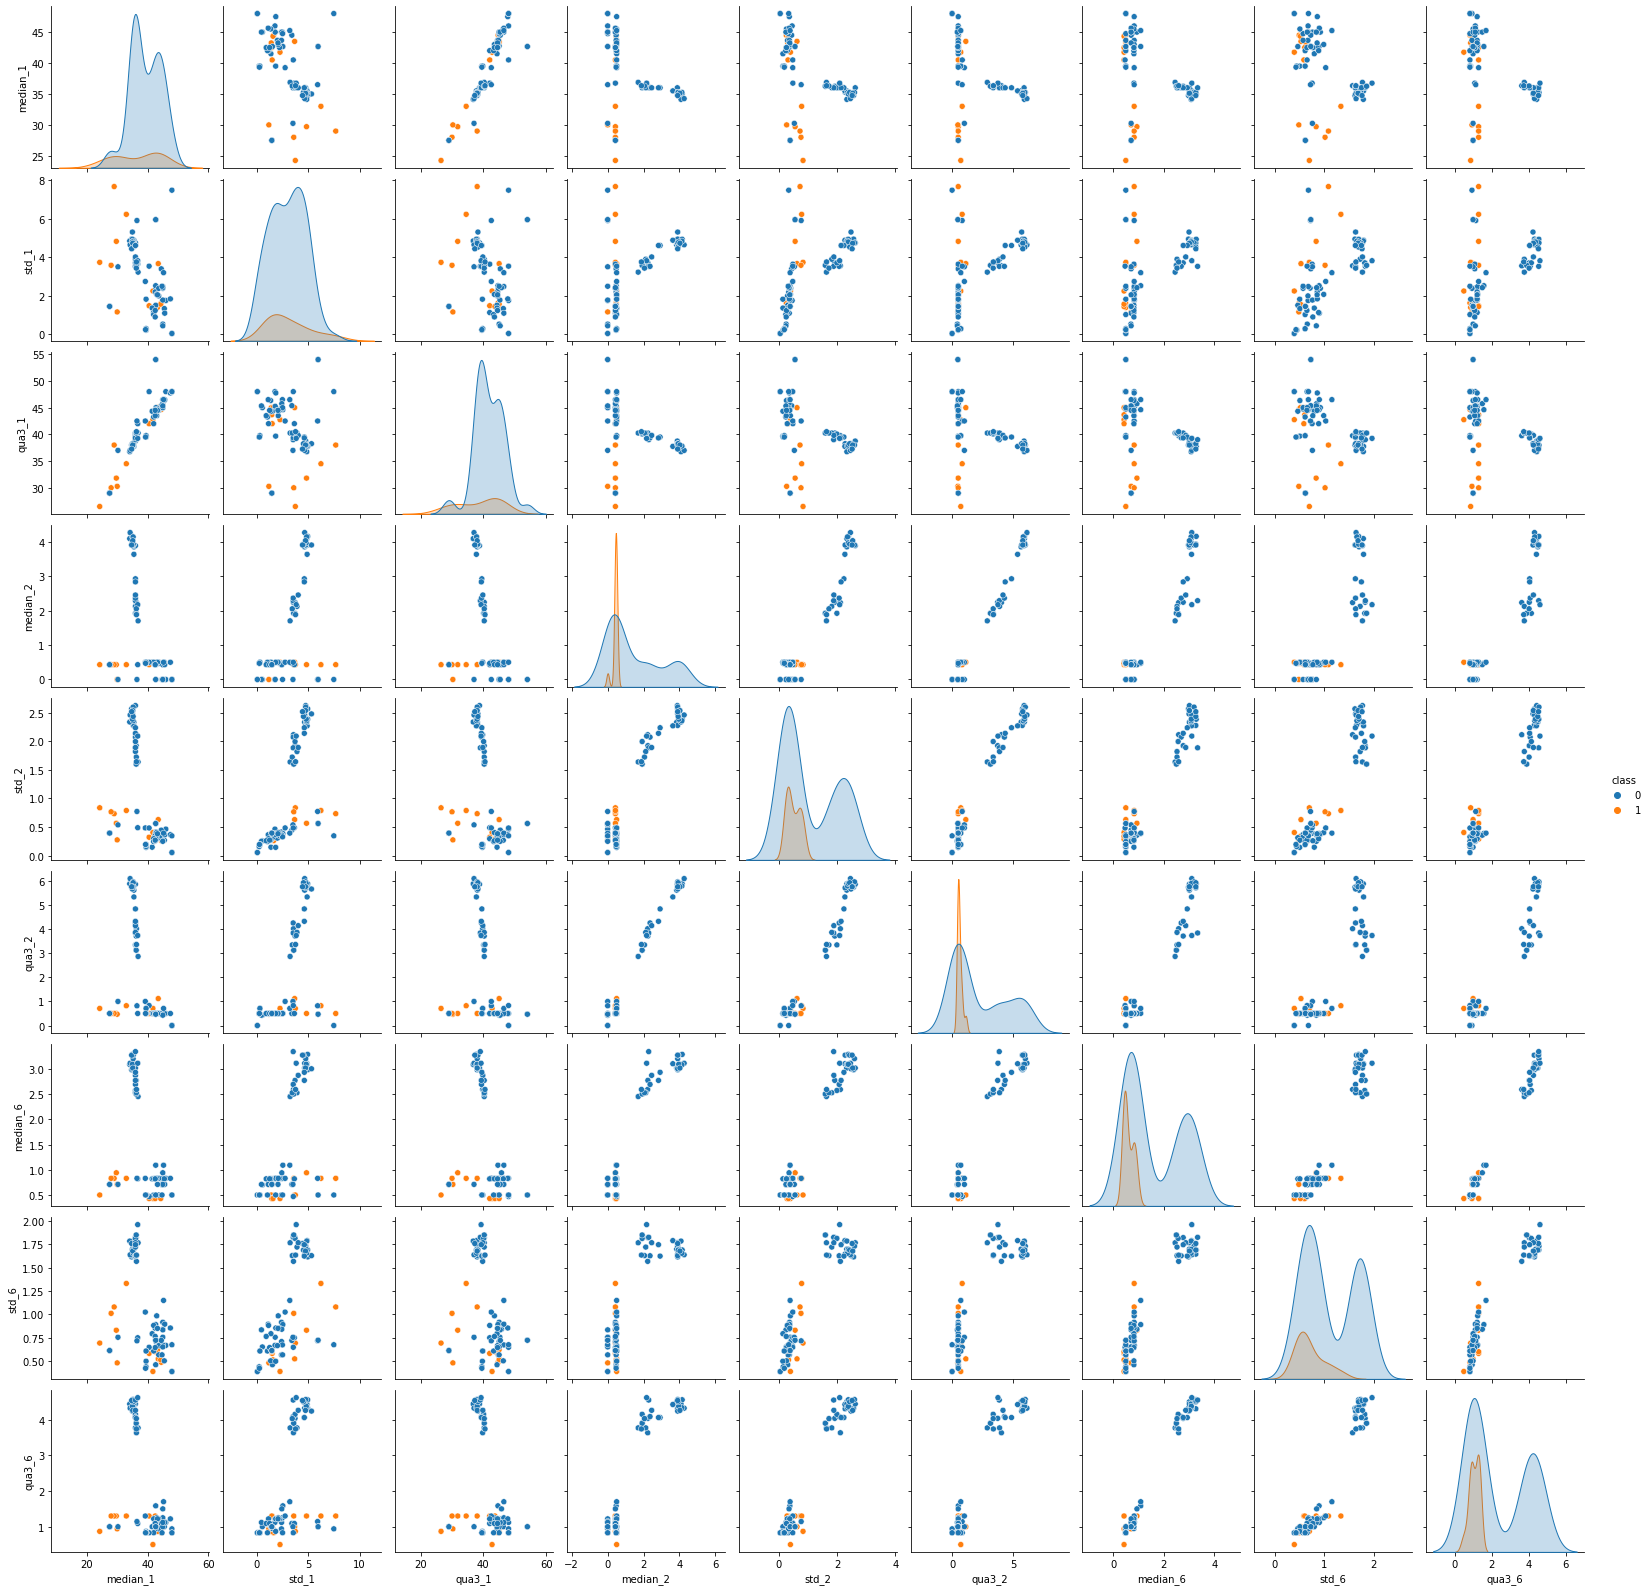

In [8]:
import seaborn as sns

scatter_plot = sns.pairplot(data=df1, vars= ['median_1','std_1','qua3_1', 'median_2','std_2','qua3_2', 'median_6','std_6','qua3_6'], hue='class')

#### ii. Splitted Plots

ii. Break each time series in your training set into two (approximately) equal length time series. Now instead of 6 time series for each of the training instances, you have 12 time series for each training instance. Repeat the experiment in 4(a)i, i.e depict scatter plots of the features extracted from both parts of the time series 1,2, and 6. Do you see any considerable difference in the results with those of 4(a)i?

In [37]:
print(df1.columns[0:])

Index(['mean_1', 'mean_2', 'mean_3', 'mean_4', 'mean_5', 'mean_6', 'min_1',
       'min_2', 'min_3', 'min_4', 'min_5', 'min_6', 'max_1', 'max_2', 'max_3',
       'max_4', 'max_5', 'max_6', 'median_1', 'median_2', 'median_3',
       'median_4', 'median_5', 'median_6', 'qua1_1', 'qua1_2', 'qua1_3',
       'qua1_4', 'qua1_5', 'qua1_6', 'qua3_1', 'qua3_2', 'qua3_3', 'qua3_4',
       'qua3_5', 'qua3_6', 'std_1', 'std_2', 'std_3', 'std_4', 'std_5',
       'std_6', 'class'],
      dtype='object')


In [154]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import defaultdict

directory = "Datasets/"
data = defaultdict(list)

#create a template for dict
columns = ["avg_rss12","var_rss12","avg_rss13", "var_rss13","avg_rss23", "var_rss23"]
parameters = ["mean","min","max","median","qua1","qua3","std"] 

col_num_dict = {col: i+1 for i, col in enumerate(columns)}

#iterate over files
for file in Path(directory).glob("**/*.csv"):
    try:
        df = pd.read_csv(file, skiprows=4)
        df = df.drop('# Columns: time', axis=1)
        parent_folder = file.parent.name
        if parent_folder == "bending1" or parent_folder == "bending2":
            classification = 1
        else:
            classification = 0
        for col in df.columns[0:]:
            a = pd.DataFrame(df[col])
            half = len(a) // 2
            a1, a2 = a[:half], a[half:]
            col_num = col_num_dict[col]
            data["mean" + '_' + str(col_num) + '_1'].append(np.mean(a1, axis = 0)[col])
            data["min" + '_' + str(col_num) + '_1'].append(np.min(a1, axis = 0)[col])
            data["max" + '_' + str(col_num) + '_1'].append(np.max(a1, axis = 0)[col])
            data["median" + '_' + str(col_num) + '_1'].append(np.median(a1))
            data["qua1" + '_' + str(col_num) + '_1'].append(np.quantile(a1, 0.25))
            data["qua3" + '_' + str(col_num) + '_1'].append(np.quantile(a1, 0.75))
            data["std" + '_' + str(col_num) + '_1'].append(np.std(a1)[col])
            data["mean" + '_' + str(col_num) + '_2'].append(np.mean(a2, axis = 0)[col])
            data["min" + '_' + str(col_num) + '_2'].append(np.min(a2, axis = 0)[col])
            data["max" + '_' + str(col_num) + '_2'].append(np.max(a2, axis = 0)[col])
            data["median" + '_' + str(col_num) + '_2'].append(np.median(a2))
            data["qua1" + '_' + str(col_num) + '_2'].append(np.quantile(a2, 0.25))
            data["qua3" + '_' + str(col_num) + '_2'].append(np.quantile(a2, 0.75))
            data["std" + '_' + str(col_num) + '_2'].append(np.std(a2)[col])
        data["class"].append(classification)
    except (pd.errors.EmptyDataError, pd.errors.ParserError, KeyError):
        #skip files that cannot be read or do not contain the expected columns
        continue
# print(data)
df1_split = pd.DataFrame.from_dict(data)
df1_split

,mean_1_1,min_1_1,max_1_1,median_1_1,qua1_1_1,qua3_1_1,std_1_1,mean_1_2,min_1_2,max_1_2,...,qua3_6_1,std_6_1,mean_6_2,min_6_2,max_6_2,median_6_2,qua1_6_2,qua3_6_2,std_6_2,class
0,43.486208,36.67,45.00,43.71,42.3300,44.50,1.279302,44.452042,36.25,48.00,...,0.8300,0.485832,0.585750,0.0,2.96,0.50,0.4225,0.8300,0.486900,1
1,44.117042,39.00,48.00,45.00,43.5000,45.00,1.357000,42.792875,37.00,46.50,...,1.1200,0.716518,0.543875,0.0,4.06,0.50,0.4300,0.7100,0.472458,1
2,43.278875,33.75,47.75,45.00,42.0000,45.25,3.466111,41.080750,33.00,46.00,...,1.2200,0.553385,0.586083,0.0,2.18,0.47,0.0000,0.8700,0.490847,1
3,41.621208,33.00,45.75,42.33,39.6525,44.25,3.112140,41.734917,39.25,43.67,...,0.7100,0.410342,0.347500,0.0,1.50,0.43,0.0000,0.5000,0.362386,1
4,40.946958,38.00,42.33,41.25,40.3100,42.00,1.100662,40.302625,37.25,45.00,...,1.3000,0.646505,0.552167,0.0,1.92,0.43,0.0000,0.9400,0.509430,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,35.692167,20.00,44.25,35.50,33.0000,39.25,4.633910,35.812542,18.50,44.00,...,4.3500,1.777777,2.966917,0.0,8.81,2.59,1.8525,3.7400,1.708491,0
84,36.954208,24.25,45.00,36.00,34.2500,40.25,3.764968,37.399875,29.00,44.67,...,3.9375,1.809945,2.838083,0.0,9.34,2.45,1.3825,3.8325,1.886811,0
85,36.342750,27.00,42.67,36.75,33.6700,39.00,3.640886,36.145417,23.33,43.50,...,4.7025,1.948773,3.513250,0.0,11.15,3.08,2.1700,4.5000,1.974270,0
86,36.865417,26.25,43.40,36.25,34.3100,40.00,3.455571,37.049500,29.25,44.25,...,4.0375,1.652046,2.904458,0.0,8.34,2.57,1.6900,3.7700,1.606436,0


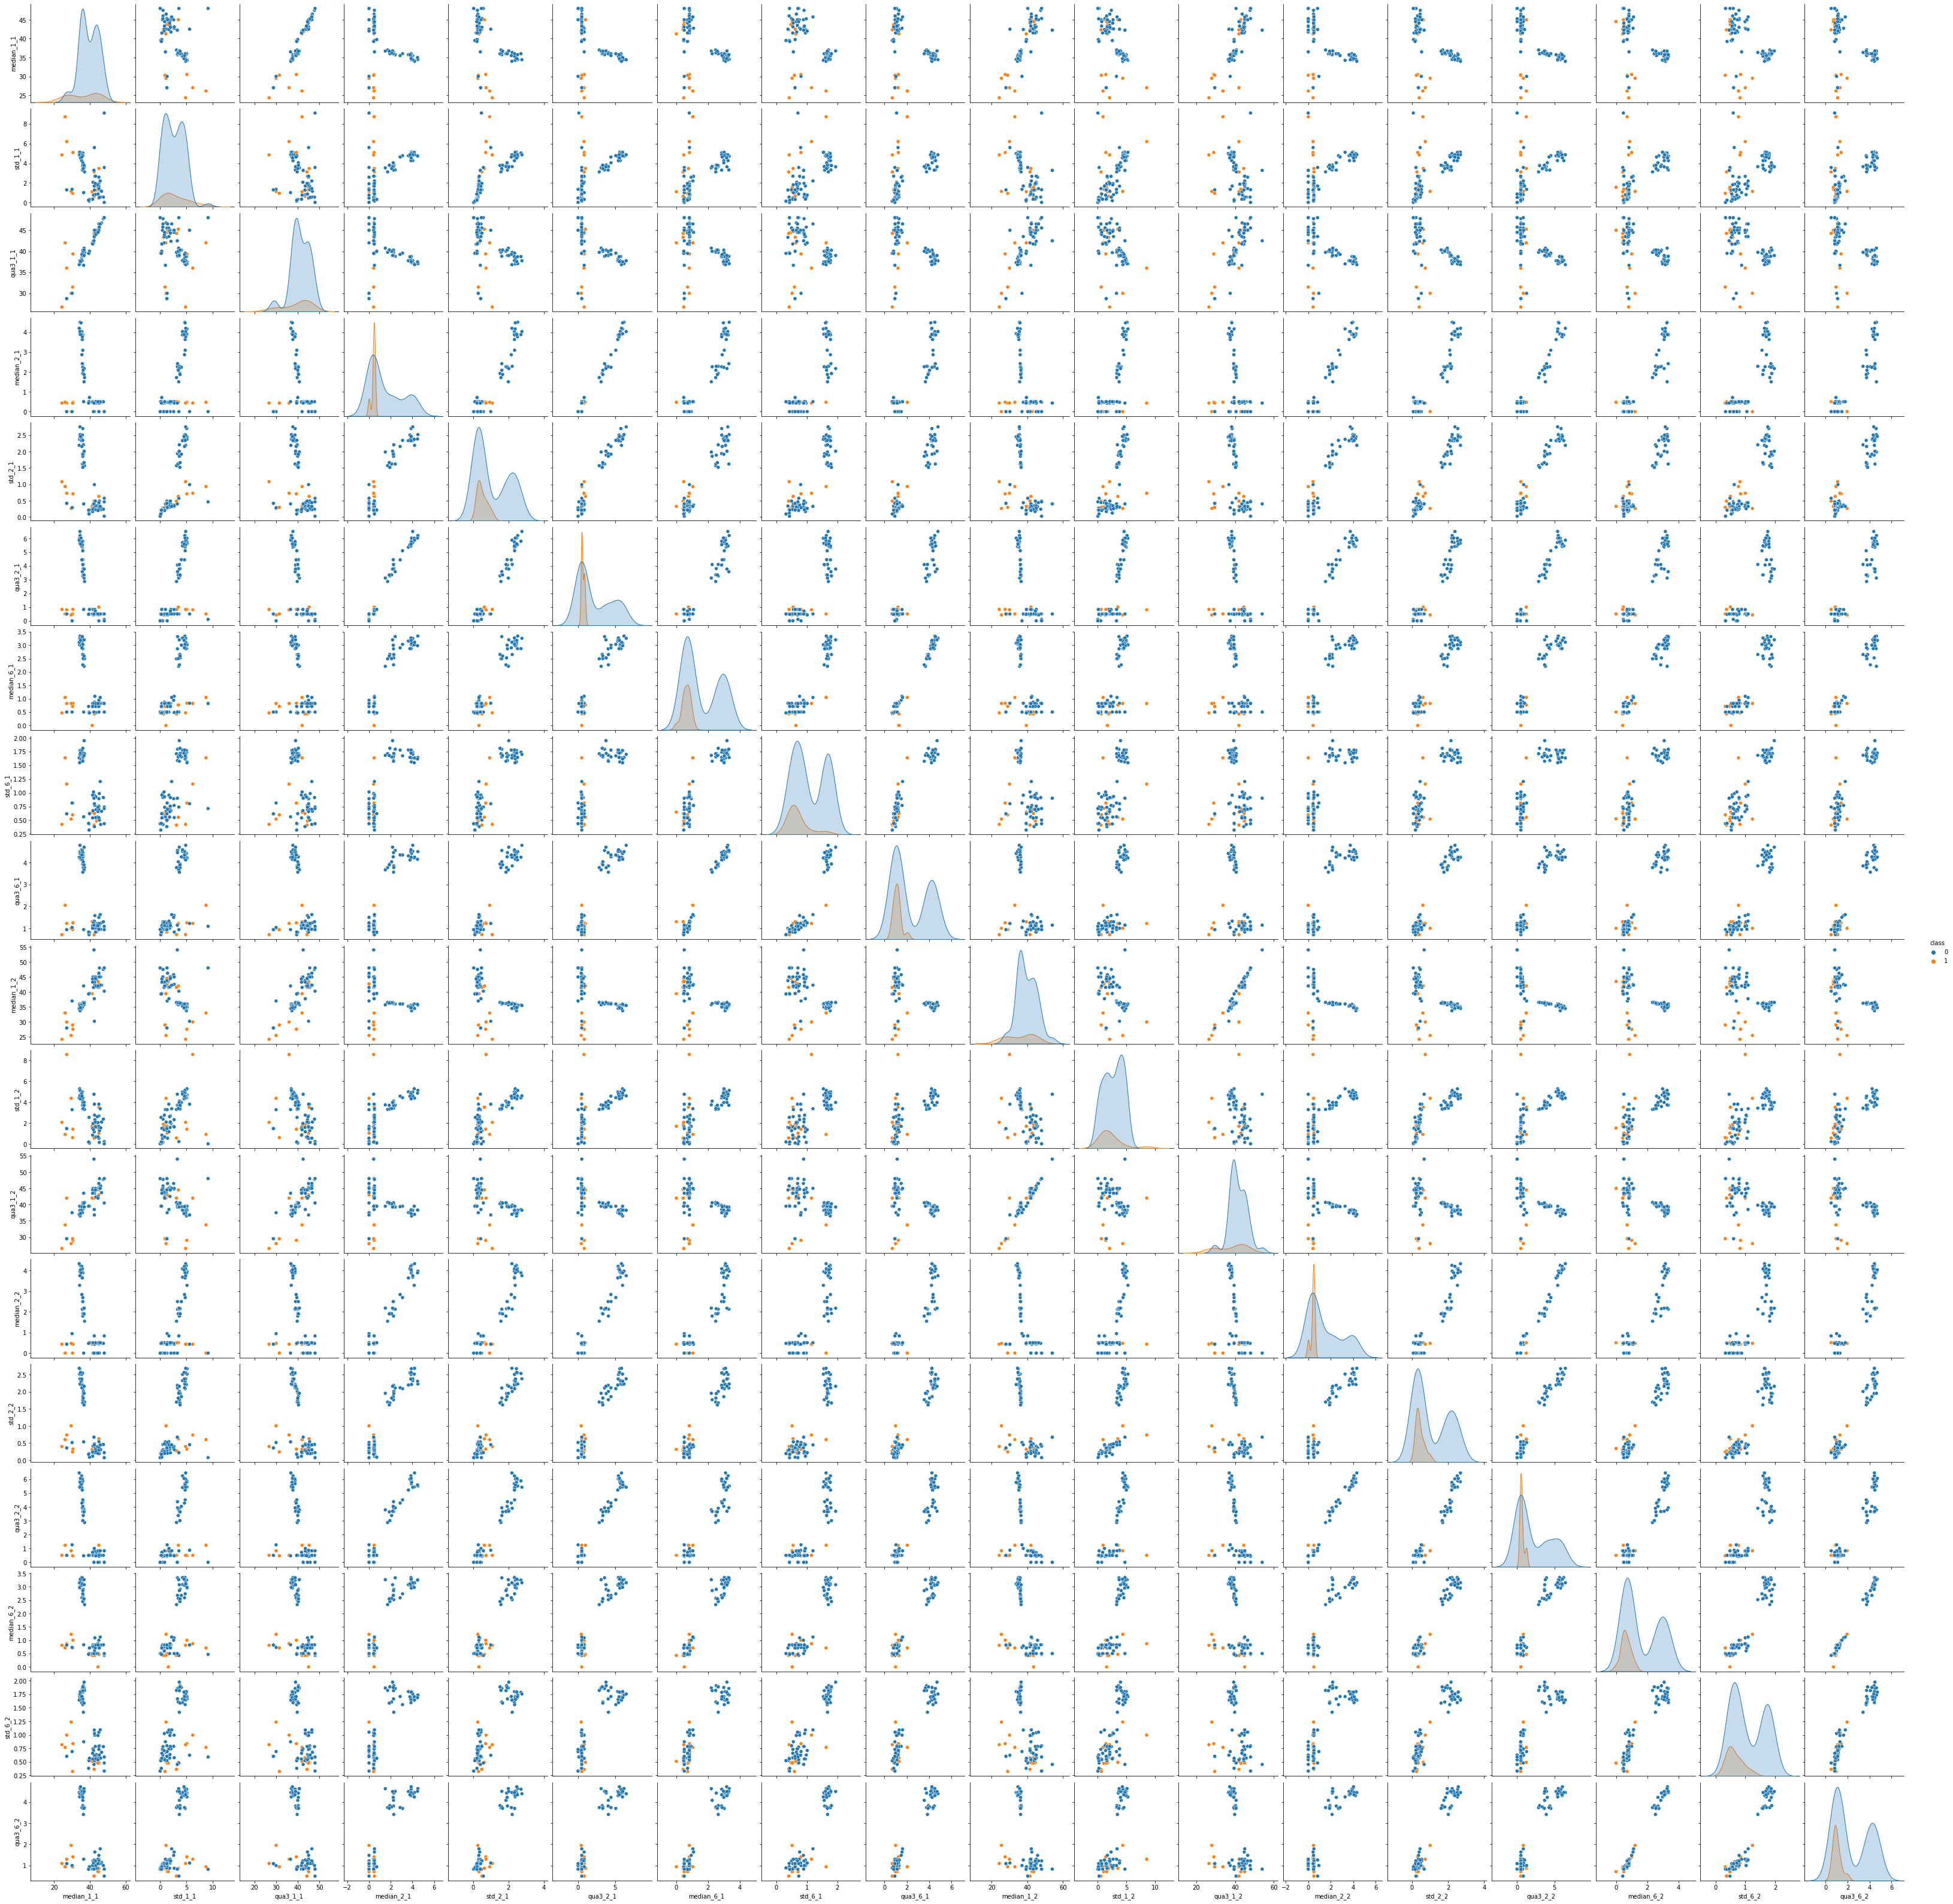

In [155]:
scatter_plot = sns.pairplot(data=df1_split, vars= ['median_1_1','std_1_1','qua3_1_1', 'median_2_1','std_2_1','qua3_2_1', 'median_6_1','std_6_1','qua3_6_1', 
                                             'median_1_2','std_1_2','qua3_1_2', 'median_2_2','std_2_2','qua3_2_2', 'median_6_2','std_6_2','qua3_6_2'], hue='class')


In [ ]:
# there are no difference between the two

#### iii. Time Series Segments

Break each time series in your training set into l = (1, 2...20) time series of approximately equal length and use logistic regression to solve the binary classification problem, using time-domain features. Calculate the p-values for your logistic regression parameters and refit a logistic regression model using your pruned set of features. Alternatively, you can use backward selection using sklearn.feature selection or glm in R. Use 5-fold cross-validation to determine the best value of l. Explain what the right way and the wrong way are to perform cross-validation in this problem. Obviously, use the right way! Also, you may encounter the problem of class imbalance, which may make some of your folds not having any instances of the rare class. In such a case, you can use stratified cross validation. Research what it means and use it if needed.

In [276]:
#####[delete]time_features = df_train_ts
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
n_splits = 5 # number of folds for stratified cross-validation

length=480
groups=[i for i in range(1,21)]
n_splits = 5 # number of folds for stratified cross-validation

cross_val_scores=[]
best_features=[]
features=[]

for grp in groups:
    df_train_ts = pd.DataFrame()
    label = []
    #loop through each files:
    for j in train_path:
#         print(j)
        if os.path.isdir(j):
            continue
        train_data_raw = pd.read_csv(j, comment='#', skiprows = 4, header=None)
        #give label\:
        if 'bending' in j:
            label.append([1]*grp)
#             print('1:', j)
        else:
            label.append([0]*grp)
#             print('0:', j)
        #assign each block in each files:
        for i in range(grp):
            #check if it is the last one:
            if (i == grp-1):
                block = train_data_raw[i*int(length/grp):]
            else:
                block = train_data_raw[i*int(length/grp):(i+1)*int(length/grp)]
            #for each block, get the time features:
            minimum = np.amin(np.array(block)[:,1:],axis=0)
            maximum = np.amax(np.array(block)[:,1:],axis=0)
            mean = np.mean(np.array(block)[:,1:],axis=0)
            median = np.median(np.array(block)[:,1:],axis=0)
            stddev = np.std(np.array(block)[:,1:],axis=0)
            first_quart = np.percentile(np.array(block)[:,1:],25,axis=0)
            third_quart = np.percentile(np.array(block)[:,1:],75,axis=0)
            df_train_ts = pd.concat([df_train_ts, pd.DataFrame(np.concatenate((minimum,maximum,mean,median,stddev,first_quart,third_quart),axis=0)).T])
#             print(df_train_ts.shape)
    df_train_ts = np.array(df_train_ts)
    label = np.array(label).ravel()
    #fit into model:
    model = LogisticRegression(max_iter=1000)
    #deal with imbalance:
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True)
    rfe = RFECV(model, step=1, cv=cv)
    #standardize:
    scaler = StandardScaler()
    df_train_ts_scaled = scaler.fit_transform(df_train_ts)
    rfe = rfe.fit(df_train_ts_scaled, label)
#     print(rfe.support_)
#     #print(rfe.ranking_)
    cross_val_scores.append(rfe.cv_results_['mean_test_score'][rfe.n_features_-1])
    feature_reduced = []
    features.append(rfe.cv_results_['mean_test_score'])
    for i in range(len(rfe.support_)):
        if (rfe.support_[i]==True):
            feature_reduced.append(i)
    best_features.append(feature_reduced)
    

l_value=(cross_val_scores.index(max(cross_val_scores))+1)
print("The best value of L is : %d" %l_value )            
print("Optimal cv score is or Training Score:" , max(cross_val_scores))
print("Optimal number of features : %d" % rfe.n_features_)

The best value of L is : 1
Optimal cv score is or Training Score: 0.9857142857142858
Optimal number of features : 13


In [291]:
#####[delete]time_features = df_train_ts
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
n_splits = 5 # number of folds for stratified cross-validation

length=480
groups=[i for i in range(1,21)]
n_splits = 5 # number of folds for stratified cross-validation

cross_val_scores=[]
best_features=[]
features=[]

n = 0

df_train_ts = pd.DataFrame()
label = []
#loop through each files:
for j in train_path:
#         print(j)
#         print(grp)
    if os.path.isdir(j):
        continue
    train_data_raw = pd.read_csv(j, comment='#', skiprows = 4, header=None)
    #give label\:
    if 'bending' in j:
        label.append([1]*grp)
#             print('1:', j)
    else:
        label.append([0]*grp)
#             print('0:', j)
    #assign each block in each files:
    for i in range(grp):
        #check if it is the last one:
        if (i == grp-1):
            block = train_data_raw[i*int(length/grp):]
        else:
            block = train_data_raw[i*int(length/grp):(i+1)*int(length/grp)]
        #for each block, get the time features:
        minimum = np.amin(np.array(block)[:,1:],axis=0)
#             print(minimum)
#             n = n+1
#             print('minimum:', n)
        maximum = np.amax(np.array(block)[:,1:],axis=0)
        mean = np.mean(np.array(block)[:,1:],axis=0)
        median = np.median(np.array(block)[:,1:],axis=0)
        stddev = np.std(np.array(block)[:,1:],axis=0)
        first_quart = np.percentile(np.array(block)[:,1:],25,axis=0)
        third_quart = np.percentile(np.array(block)[:,1:],75,axis=0)
        df_train_ts = pd.concat([df_train_ts, pd.DataFrame(np.concatenate((minimum,maximum,mean,median,stddev,first_quart,third_quart),axis=0)).T])
print(df_train_ts.shape)
df_train_ts = np.array(df_train_ts)
label = np.array(label).ravel()
#fit into model:
model = LogisticRegression(max_iter=1000)
#deal with imbalance:
cv = StratifiedKFold(n_splits=n_splits, shuffle=True)
rfe = RFECV(model, step=1, cv=cv)
#standardize:
scaler = StandardScaler()
df_train_ts_scaled = scaler.fit_transform(df_train_ts)
rfe = rfe.fit(df_train_ts_scaled, label)
#     print(rfe.support_)
#     #print(rfe.ranking_)
cross_val_scores.append(rfe.cv_results_['mean_test_score'][rfe.n_features_-1])
feature_reduced = []
features.append(rfe.cv_results_['mean_test_score'])
for i in range(len(rfe.support_)):
    if (rfe.support_[i]==True):
        feature_reduced.append(i)
best_features.append(feature_reduced)
    

l_value=(cross_val_scores.index(max(cross_val_scores))+1)
print("The best value of L is : %d" %l_value )            
print("Optimal cv score is or Training Score:" , max(cross_val_scores))
print("Optimal number of features : %d" % rfe.n_features_)

(1380, 42)
The best value of L is : 1
Optimal cv score is or Training Score: 0.9471014492753623
Optimal number of features : 24


In [268]:
print(df_train_ts.shape)

<class 'numpy.ndarray'>


#### iv. Confusion Matrix

 Report the confusion matrix and show the ROC and AUC for your classifier on train data. Report the parameters of your logistic regression Beta-i's as well as the p-values associated with them.

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The Classification Accuracy is :
The Confusion Matrix is :
[[1176   24]
 [  43  137]]
False Positive Rate: 0.02
True Positive Rate: 0.7611111111111111
The AUC Score is : 0.979083
Coefficient Beta Values : [[ 0.03322268 -0.19914239 -0.03932539 -0.11410757  0.11967006  0.143194
   0.01570322 -0.30377093  0.03153215  0.10357196  0.44836355  0.07432126
  -0.18478779 -0.44108741  0.03889808 -0.17671154 -0.0028927   0.11923816
   0.07640472 -0.55974164  0.13700198 -0.20898771  0.09633186  0.04267561
   0.09935153  0.07726713 -0.08760842  0.01790391  0.21420027  0.06022777
  -0.27828518 -0.55125104 -0.26279772 -0.22302764  0.27434378 -0.01630748
   0.05865696 -0.40578807  0.02868879 -0.34873579 -0.37147964  0.07734389]]


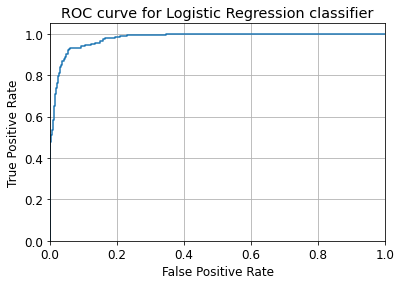

In [263]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
model = LogisticRegression()

model.fit(df_train_ts,label)

Y_pred = model.predict(df_train_ts)
print("The Classification Accuracy is :" %metrics.accuracy_score(label, Y_pred))
print("The Confusion Matrix is :")
cm = metrics.confusion_matrix(label, Y_pred)
print(cm)

TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]

TPR = TP/(TP+FN)
FPR = FP / float(TN + FP)
y_pred_prob = model.predict_proba(df_train_ts)[:, 1]
print('False Positive Rate:',FPR)
print('True Positive Rate:', TPR)

fpr, tpr, thresholds = metrics.roc_curve(label, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Logistic Regression classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

print("The AUC Score is : %f" %metrics.roc_auc_score(label, y_pred_prob))

Beta_values = model.coef_
print('Coefficient Beta Values :', Beta_values)